In [1]:
import importlib
import os
import my_gwflow_functions
importlib.reload(my_gwflow_functions)
from my_gwflow_functions import *
from concurrent.futures import ProcessPoolExecutor

LEVEL = "huc12"
RESOLUTION = 250
BASE_PATH = fr"/data/MyDataBase/SWATGenXAppData/"
NAMES = os.listdir(f"/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/{LEVEL}")
start_year=2002
end_year =2005
NAME = NAMES[0]

NAMES= ["40500050207"]

for NAME in NAMES:
    
    MODEL_NAME= 'SWAT_gwflow_MODEL'
    print(NAME)
    
    try:
        model_base_path = os.path.join(BASE_PATH, f'SWATplus_by_VPUID/{LEVEL}/{NAME}/{MODEL_NAME}')
        if os.path.exists(model_base_path):
            print('gwflow model exists')
            continue
        completion_status, GRIDS_TABLE = creating_gwflow(BASE_PATH, LEVEL, NAME, RESOLUTION,start_year, end_year, MODEL_NAME)
        print(completion_status)
        
    except Exception as e:
        print(f'############################## EEROR  {e} #####################################')
        

40500050207
begin
Directory does not exist: /data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/huc12/40500050207/SWAT_gwflow_MODEL/Scenarios/Default/TxtInOut
Target path: /data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/huc12/40500050207/SWAT_gwflow_MODEL/Scenarios/Default/TxtInOut
environment: /data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/huc12/40500050207/SWAT_gwflow_MODEL\gwflow_gis
Generated shap saved to: bound_shape.shp
Generated shape saved to: active_domain_shape.shp
length of HRUS array: 4844
Maximum value of HRUS ID: 4844
Unique HRUS IDs: 4844
Extracted values saved to: HRUS_shape.shp
Extracted values saved to: Bound_shape.shp
Extracted values saved to: Active_shape.shp
length of Channel array: 151
Maximum value of Channel ID: 160
Unique Channel IDs: 151
Extracted values saved to: Channel_shape.shp
Extracted values saved to: Subbasin_shape.shp
Extracted values saved to: LakeId_shape.shp
Extracted values saved to: Thick_shape.shp
Extracted values saved to: aq_zone_shape

D:\MyDataBase\codes\my_gwflow_functions.py:216: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[214.922 202.416 208.795 204.575 210.434 202.397 202.416 211.475 214.733
 202.416 209.052 213.734 201.838 202.416 202.416 213.821 202.436 202.416
 208.368 209.626 202.302 205.537 202.416 202.949 203.643 202.416 208.765
 206.863 203.783 202.564 208.757 215.915 216.775 202.416 203.437 212.47
 202.407 202.416 215.891 212.831 208.03  203.432 202.416 213.774 206.107
 202.416 202.418 214.115 203.728]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grids_point.loc[lake_index, 'Lake_bed']   = grids_point.loc[lake_index, 'Elev'] - Lake_bed_depth
D:\MyDataBase\codes\my_gwflow_functions.py:217: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[224.922 212.416 218.795 214.575 220.434 212.397 212.416 221.475 224.733
 212.416 2

check: Number of negative heads: 3809
check: Number of heads 10m above the elevation: 0
check: Total number of grids cell 8200
number of zones: [4. 3. 2. 1.]
number of zones: [4. 3. 2. 1.]
rows: 100 cols: 82
HRUs that are connected to cells (file gwflow.hrucell) 4844
HRUs that are connected to cells (file gwflow.cellhru) 3835
File saved to /data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/huc12/40500050207/SWAT_gwflow_MODEL/Scenarios/Default/TxtInOut
SWATgwflow are prepared


In [1]:
import importlib
import os
import my_gwflow_functions
importlib.reload(my_gwflow_functions)
from my_gwflow_functions import *
from concurrent.futures import ProcessPoolExecutor

LEVEL = "huc12"
RESOLUTION = 250
BASE_PATH = fr"/data/MyDataBase/SWATGenXAppData/"
NAMES = os.listdir(f"/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/{LEVEL}")
start_year=2002
end_year =2005
NAME = NAMES[0]

NAME= "40601050201"

completion_status, GRIDS_TABLE = creating_gwflow(BASE_PATH, LEVEL, NAME, RESOLUTION,start_year, end_year, MODEL_NAME)


NameError: name 'MODEL_NAME' is not defined

In [60]:
import glob
import os
import geopandas as gpd
import pandas as pd
#from my_gwflow_functions import *
BASE_PATH = fr"/data/MyDataBase/SWATGenXAppData/"
MODEL_NAME = 'SWAT_gwflow_MODEL'
LEVEL = 'huc12'
NAMES = os.listdir(f"/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/{LEVEL}")

NAME = NAMES[0]
base_gis = fr'/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/{LEVEL}/{NAME}/SWAT_gwflow_MODEL/gwflow_gis'

grids = pd.read_pickle(f'/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/huc12/{NAME}/MODFLOW_250/Grids_MODFLOW.pk1')
shapes_path = glob.glob(base_gis+'\\*.shp')
shapefiles= {}
for file_path in shapes_path:
    shapefiles[os.path.basename(file_path).split('.')[0]] = {file_path}

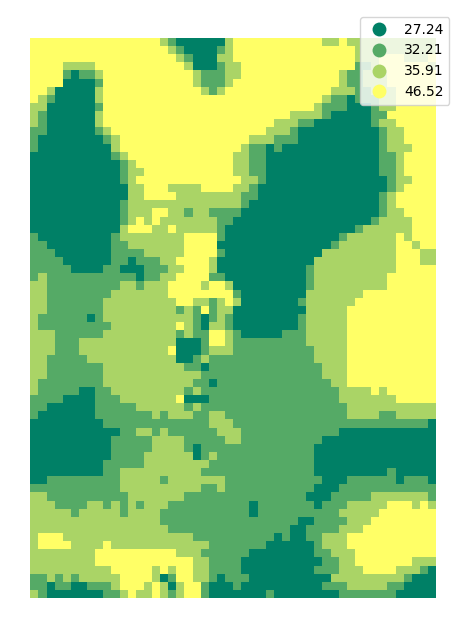

In [79]:
fig, ax = plt.subplots(figsize=[8,8])
Zone_Shape['k'] = Zone_Shape['k'].round(2)

grids.sjoin(Zone_Shape).plot(column='k', ax=ax, legend=True, categorical=True, cmap='summer')

ax.set_axis_off()


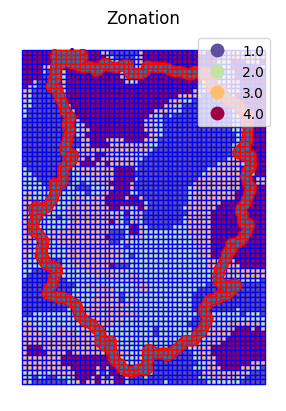

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'shapefiles' is a dictionary with keys 'active_domain_shape' and 'Bound_shape'
active_domain_shapefile = list(shapefiles['active_domain_shape'])[0]
bound_shapefile = list(shapefiles['Bound_shape'])[0]

# Reading the shapefiles
active_domain = gpd.read_file(active_domain_shapefile)
bound_shape = gpd.read_file(bound_shapefile)

# Creating a plot
fig, ax = plt.subplots()
active_domain.plot(ax=ax, edgecolor='blue')  # You can customize colors and styles
grids.sjoin(Zone_Shape).plot(ax=ax, edgecolor='blue',column='Zone',categorical=True, cmap='Spectral_r',legend=True)  # this is a 
bound_shape.plot(ax=ax, edgecolor='red')
plt.title('Zonation')
# Remove the axes
ax.set_axis_off()

plt.show()


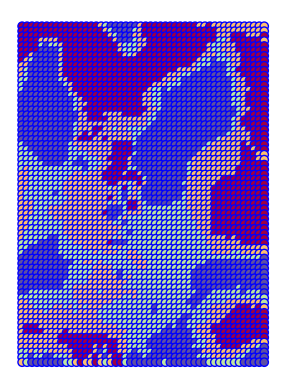

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'shapefiles' is a dictionary with keys 'active_domain_shape' and 'Bound_shape'
Zone_Shape = list(shapefiles['Zone_Shape'])[0]

# Reading the shapefiles
Zone_Shape = gpd.read_file(Zone_Shape)

# Creating a plot
fig, ax = plt.subplots()

# Remove the axes
ax.set_axis_off()

plt.show()


In [46]:
Zone_Shape

,Cell_ID,HHC,Zone,Sy,k,geometry
0,1,49.212756,4.0,0.20,46.519024,POINT (3959440.705 51514.184)
1,2,45.737208,4.0,0.20,46.519024,POINT (3959690.705 51514.184)
2,3,43.227396,4.0,0.20,46.519024,POINT (3959940.705 51514.184)
3,4,40.639248,4.0,0.20,46.519024,POINT (3960190.705 51514.184)
4,5,39.454722,4.0,0.20,46.519024,POINT (3960440.705 51514.184)
...,...,...,...,...,...,...
3445,3446,28.529941,1.0,0.05,27.237222,POINT (3970690.705 34514.184)
3446,3447,26.721542,1.0,0.05,27.237222,POINT (3970940.705 34514.184)
3447,3448,24.605399,1.0,0.05,27.237222,POINT (3971190.705 34514.184)
3448,3449,21.854612,1.0,0.05,27.237222,POINT (3971440.705 34514.184)


In [68]:
import importlib
import os
import my_gwflow_functions
importlib.reload(my_gwflow_functions)
from my_gwflow_functions import *

# Usage
BASE_PATH = fr"/data/MyDataBase/SWATGenXAppData/"
MODEL_NAME = 'SWAT_gwflow_MODEL'
LEVEL = 'huc12'

success_models, failed_models, not_created_models = check_gwflow_integration(BASE_PATH, LEVEL, MODEL_NAME)

print('Number of successful models:', len(success_models))
print('Number of failed models:', len(failed_models))
print('Number of not created models:', len(not_created_models))


gwflow_flux_recharge 40500010102 Size: 32 failed
gwflow_flux_recharge 40500010206 Size: 1587252 success
gwflow_flux_recharge 40500012304 Size: 1123828 success
gwflow_flux_recharge 40500012403 Size: 1585268 success
gwflow_flux_recharge 40500020207 Size: 294917 success
gwflow_flux_recharge 40500020402 Size: 379972 success
gwflow_flux_recharge 40500030307 Size: 999140 success
gwflow_flux_recharge 40500030310 Size: 262964 success
gwflow_flux_recharge 40500030505 Size: 165972 success
gwflow_flux_recharge 40500030805 Size: 296620 success
gwflow_flux_recharge 40500040502 Size: 32 failed
gwflow_flux_recharge 40500040504 Size: 1623156 success
gwflow_flux_recharge 40500050207 Size: 32 failed
gwflow_flux_recharge 40500050302 Size: 169212 success
gwflow_flux_recharge 40500060401 Size: 1364268 success
gwflow_flux_recharge 40500070211 Size: 2005292 success
gwflow_flux_recharge 40601010503 Size: 499453 success
gwflow_flux_recharge 40601010803 Size: 1741372 success
gwflow_flux_recharge 40601020302 Siz

In [ ]:
################# creating gwflow module in parallel
import importlib
import os
import my_gwflow_functions
importlib.reload(my_gwflow_functions)
from my_gwflow_functions import *
from multiprocessing import Process

if __name__ == "__main__":
    # Getting the list of NAMES
    LEVEL = "huc8"  # Assuming LEVEL is predefined or set here
    NAMES = os.listdir(f"/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/{LEVEL}")
    MODEL_NAME = 'SWAT_gwflow_MODEL'
    # Starting a separate process for the 11th entry in NAMES
    start_year =2002
    end_year = 2005
    for NAME in NAMES:
        if NAME in failed_models:
            process = Process(target=process_gwflow, args=(LEVEL, NAME,start_year,end_year,MODEL_NAME))
            process.start()


In [ ]:
###### creating figures, shapefiles and rasters for output recharge
import importlib
import os
import my_gwflow_functions
importlib.reload(my_gwflow_functions)
from my_gwflow_functions import *
#### generating figures
LEVEL = 'huc12'
NAMES = os.listdir(f"/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/{LEVEL}")
for NAME in  NAMES[1:]:
    print(NAME)
    rech_out_folder = fr"D:\MyDataBase\SWATplus_by_VPUID\huc12/{NAME}/SWAT_gwflow_MODEL/recharg_output"
    gis_folder = f'/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/{LEVEL}/{NAME}/SWAT_gwflow_MODEL/gwflow_gis/'
    SOURCE_path = f'/data/MyDataBase/SWATGenXAppData/SWATplus_by_VPUID/{LEVEL}/{NAME}/SWAT_gwflow_MODEL/Scenarios/Default/TxtInOut/'
    start_year =2002 
    end_year = 2005
    create_recharge_image_for_name(SOURCE_path, LEVEL, NAME, RESOLUTION,gis_folder, rech_out_folder, start_year, end_year)

In [48]:
failed_models

['40500010102',
 '40500020207',
 '40500040502',
 '40500050207',
 '40500050302',
 '40601030209',
 '40801010405',
 '40802040208',
 '40900010209',
 '40900030303',
 '40900040404']

In [ ]:
arcpy.Copy_management